# Natural Language Processing
---------------------------------------------------

This example shows how to use ATOM to quickly go from raw text data to model predictions.

## Load the data

In [1]:
import numpy as np
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Use a subset of the available categories for faster processing
X_text, y_text = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
    shuffle=True,
    random_state=1,
)
X_text = np.array(X_text).reshape(-1, 1)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X_text, y_text, test_size=0.3, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ====================== >>
Shape: (2846, 2)
Scaled: False
Categorical features: 1 (100.0%)
---------------------------------------
Train set size: 1993
Test set size: 853
---------------------------------------
|    | dataset   | train     | test      |
|---:|:----------|:----------|:----------|
|  0 | 480 (1.0) | 336 (1.0) | 144 (1.0) |
|  1 | 593 (1.2) | 414 (1.2) | 179 (1.2) |
|  2 | 585 (1.2) | 400 (1.2) | 185 (1.3) |
|  3 | 594 (1.2) | 440 (1.3) | 154 (1.1) |
|  4 | 594 (1.2) | 403 (1.2) | 191 (1.3) |



In [4]:
atom.dataset  # Note that the feature is named 'Corpus'

,Corpus,Target
0,From: lehr@austin.ibm.com (Ted Lehr)\nSubject:...,4
1,From: 02106@ravel.udel.edu (Samuel Ross)\nSubj...,2
2,From: callison@uokmax.ecn.uoknor.edu (James P....,3
3,From: wrat@unisql.UUCP (wharfie)\nSubject: Re:...,3
4,From: ip02@ns1.cc.lehigh.edu (Danny Phornpraph...,3
...,...,...
2841,From: marc@ccvi.ccv.FR (Marc Bassini)\nSubject...,1
2842,From: mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Bl...,3
2843,From: sasghm@theseus.unx.sas.com (Gary Merrill...,4
2844,From: jimf@centerline.com (Jim Frost)\nSubject...,3


In [5]:
atom.Corpus[0]  # Let's have a look at the first document

'From: lehr@austin.ibm.com (Ted Lehr)\nSubject: Re: Science and methodology (was: Homeopathy ... tradition?)\nOriginator: lehr@jan.austin.ibm.com\nDistribution: inet\nOrganization: IBM Austin\nLines: 47\n\n\nGary Merrill writes:\n> .. Not every wild flight of fancy serves\n> (or can serve) in the appropriate relation to a hypothesis.  It is\n> somewhat interesting that when anyone is challanged to provide an\n> example of this sort the *only* one they come up with is the one about\n> Kekule.  Surely, there must be others.  But apparently this is regarded\n> as an *extreme* example of a "non-rational" process in science whereby\n> a successful hypothesis was proposed.  But how non-rational is it?\n\nIndeed, an extreme example.  It came "out of nowhere."  The connection\nKekule saw between it and his problem is fortunate but not extraordinary.\nI, for example, often receive/conjure solutions (hypotheses for solutions) \nto my everyday problems at moments when I appear to myself to be occ

In [6]:
# Clean the documents from noise (emails, numbers, etc...)
atom.textclean()

Filtering the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [7]:
atom.drops  # We can check the removed items

,email,url,html,emoji,number
0,"[lehr@austin.ibm.com, lehr@jan.austin.ibm.com,...",NaN,NaN,NaN,"[47, 2, 78758]"
1,"[02106@ravel.udel.edu, 02106@chopin.udel.edu, ...",NaN,NaN,NaN,"[25, 1986, 720]"
2,"[callison@uokmax.ecn.uoknor.edu, 1993apr15.223...",NaN,"[<>, <>]",NaN,"[26, 89]"
3,"[wrat@unisql.uucp, c5r43y.f0d@mentor.cc.purdue...",NaN,[<>],NaN,"[12, 80, 55, 65, 80, 80, 1958, 80, 1993]"
4,"[ip02@ns1.cc.lehigh.edu, ip02@lehigh.edu]",NaN,NaN,NaN,"[15, 215, 758, 4141]"
...,...,...,...,...,...
2841,"[marc@ccvi.ccv.fr, jb@sgihbtn.sierra.com, jb@s...",NaN,NaN,NaN,"[16, 82, 75008, 40, 08, 07, 07, 43, 87, 35, 99]"
2842,"[mwbg9715@uxa.cso.uiuc.edu, zowie@daedalus.sta...",NaN,NaN,NaN,"[12, 5, 7, 40, 40, 5, 30, 10, 30, 20, 50]"
2843,"[sasghm@theseus.unx.sas.com, sasghm@theseus.un...",NaN,[<>],NaN,"[55, 400, 27513, 919, 677, 8000]"
2844,"[jimf@centerline.com, tcorkum@bnr.ca, jimf@cen...",NaN,NaN,NaN,"[14, 140, 239, 3, 202, 5]"


In [8]:
atom.Corpus[0]  # See how the first document changed

'from  ted lehr\nsubject re science and methodology was homeopathy  tradition\noriginator \ndistribution inet\norganization ibm austin\nlines \n\n\ngary merrill writes\n  not every wild flight of fancy serves\n or can serve in the appropriate relation to a hypothesis  it is\n somewhat interesting that when anyone is challanged to provide an\n example of this sort the only one they come up with is the one about\n kekule  surely there must be others  but apparently this is regarded\n as an extreme example of a nonrational process in science whereby\n a successful hypothesis was proposed  but how nonrational is it\n\nindeed an extreme example  it came out of nowhere  the connection\nkekule saw between it and his problem is fortunate but not extraordinary\ni for example often receiveconjure solutions hypotheses for solutions \nto my everyday problems at moments when i appear to myself to be occupied \nwith activities quite removed  algorithms for that new software feature come\nwhen i tram

In [9]:
# Convert the strings to a sequence of words
atom.tokenize()

Tokenizing the corpus...


In [10]:
atom.Corpus[0][:7]  # Print the first few words of the first document

['from', 'ted', 'lehr', 'subject', 're', 'science', 'and']

In [11]:
# Normalize the text to a predefined standard
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


In [12]:
atom.Corpus[0][:7]  # Check the changes...

['ted', 'lehr', 'subject', 'science', 'methodology', 'homeopathy', 'tradition']

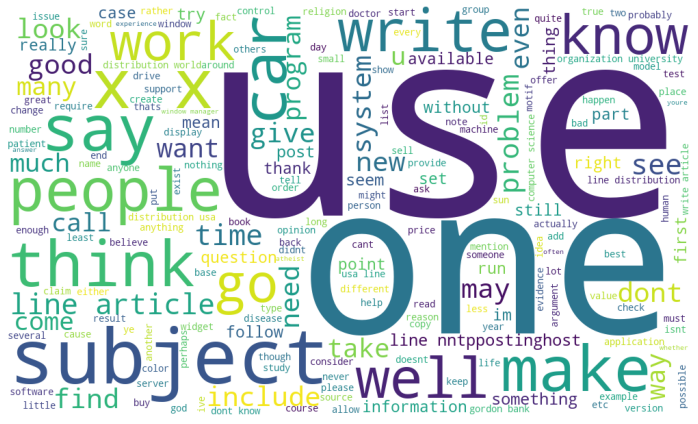

In [13]:
# Visualize the most common words with a wordcloud
atom.plot_wordcloud()

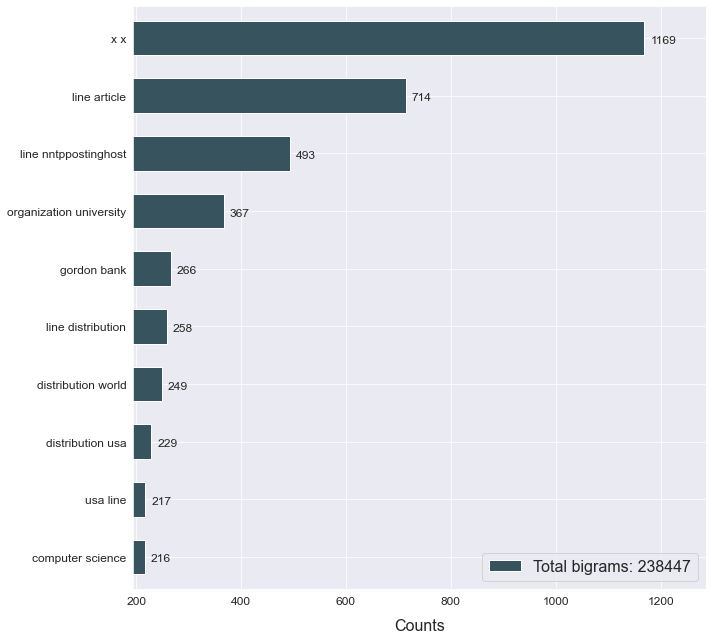

In [14]:
# Have a look at the most frequent bigrams
atom.plot_ngrams(2)

In [15]:
# Create the bigrams using the tokenizer again
atom.tokenize(bigram_freq=215)

Tokenizing the corpus...
 --> Creating 10 bigrams on 4178 locations.


In [16]:
atom.bigrams

,bigram,frequency
9,"(x, x)",1169
3,"(line, article)",714
4,"(line, nntppostinghost)",493
0,"(organization, university)",367
8,"(gordon, bank)",266
5,"(line, distribution)",258
6,"(distribution, world)",249
1,"(distribution, usa)",229
2,"(usa, line)",217
7,"(computer, science)",216


In [17]:
# As a last step before modelling, convert the words to vectors
atom.vectorize(strategy="tf-idf")

Vectorizing the corpus...


In [18]:
atom.shape

(2846, 28630)

In [19]:
# Train the model
atom.run("MLP", metric="f1_weighted")


Training ===================================== >>
Models: MLP
Metric: f1_weighted


Results for Multi-layer Perceptron:         
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 0.8743
Time elapsed: 39.814s
-------------------------------------------------
Total time: 39.814s


Final results ========================= >>
Duration: 39.815s
------------------------------------------
Multi-layer Perceptron --> f1_weighted: 0.8743


## Analyze results

In [20]:
atom.scoring()

,f1_weighted,jaccard_weighted,matthews_corrcoef,precision_weighted,recall_weighted
MLP,0.87426,0.779983,0.84769,0.879316,0.876905
